In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt


In [3]:
A = 0
B = 1
n = 41
h = (B-A)/(n-1)
x_j = np.linspace(A, B, n)



def real(x, p1=2, p2=np.pi*5.5, p3=1.123):
    '''Defining the coefficient p in the d.e.'''
    return p1 * np.sin(p2 * x) + p3

def q(x):
    return 2*np.cos(x)
def k(x):
    return 2*np.sin(2*x)


In [4]:

alpha1 = 1
alpha2 = 1

def find_params2(k_x, q_x, a1, a2, a, b, real):
    
    du = lambda a: (real(a+1/10000) - real(a))/(1/10000)
    f_x = lambda x: -(k_x(x+1/10000)*du(x+1/10000) - k_x(x)*du(x))/(1/10000) + q_x(x)*real(x) 



    mu1 = -du(a) * k_x(a) + a1*real(a)
    mu2 = du(a)* k_x(b) + a2*real(b)
    return f_x, mu1, mu2




rhs, mu1, mu2 = find_params2(k,q, alpha1, alpha2, A, B+h, real)
print(rhs(1), mu1, mu2)

-1086.6997873617415 1.123 60.636767299115256


In [5]:
def A_U(k,q, u1x,a, b,x, n=10000):
    step = (b-a)/n
    
    du1 = lambda x: (u1x(x+step) - u1x(x)) / step
    
    duk1du1  = lambda x: (k(x+step) - k(x))/step * du1(x) + (du1(x+step) - du1(x))/step * k(x) 
    return  -duk1du1(x)  + q(x)*u1x(x)

A1 =  (alpha2*mu1-alpha1*mu2)/(alpha2*(-k(A)+A*alpha1)-alpha1*(k(B)+B*alpha2))
print(A1)

B1 =  (k(B)*A1+alpha2*B*A1-mu2)/(-alpha2)
print(B1)


21.11469380639003
1.1230000000000047


In [6]:
x_j

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ])

In [7]:
def find_phi(x,j):
    
    if j== 0:
        if x < x_j[0]:
            return 0
        elif x > x_j[1]:
            return 0
        else: return (x_j[j+1]-x)/h
    elif j == n-1:
        if x>x_j[-1]:
            return 0
        elif x < x_j[-2]:
            return 0
        
        return (x-x_j[j-1])/h
    elif x < x_j[j]-h or x> x_j[j+1]:
        return 0
    
    elif x <= x_j[j]:
        return (x-x_j[j-1])/h
    else:
        return (x_j[j+1]-x)/h

In [8]:
alpha_ii = np.zeros((n,n))
alpha_ii


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
acc = 1000
step = h/(acc-1)

for i in range(1,n):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (-k(x_j[i]-h+l*step ) + (x_j[i]-h+l*step - x_j[i-1])*(x_j[i] - (x_j[i]-h+l*step))*q(x_j[i]-h+l*step))*step
    alpha_ii[i,i-1] = 1/h**2* (sum_ii )
for i in range(n-1):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (-k(x_j[i]+l*step) + (x_j[i]+l*step - x_j[i])*(x_j[i+1] - (x_j[i]+l*step))*q(x_j[i]+l*step))*step
    alpha_ii[i,i+1] = 1/h**2* (sum_ii )
for i in range(n):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (k(x_j[i]-h+l*step) + (x_j[i]-h+l*step - x_j[i-1])**2*q(x_j[i-1]+l*step))*step
        sum_ii+= (k(x_j[i]+l*step) + (-x_j[i]-l*step + x_j[i]+h)**2*q(x_j[i]+l*step))*step
    alpha_ii[i,i] = 1/h**2* (sum_ii)    

alpha_ii[0,0] =  1/h**2 * np.sum([(k(x_j[0]+l*step)+h*h* find_phi(x_j[0]+l*step, 0)**2*q(x_j[0]+l*step))*step for l in range(acc)])  
alpha_ii[-1,-1] = 1/h**2* np.sum([(k(x_j[n-2]+l*step)+h*h*find_phi(x_j[n-2] + l*step,n-1)**2*q(x_j[n-2]+l*step))*step for l in range(acc)]) 
alpha_ii[0,0]+= alpha1
alpha_ii[-1,-1] += alpha2 

print(A)
alpha_ii

0


array([[  3.01827571,  -1.99325199,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.99325199,   8.03470715,  -5.99142335, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  -5.99142335,  16.01601191, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 151.51581803,
        -75.09634647,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -75.09634647,
        148.73905394, -73.61462245],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -73.61462245,  74.62831812]])

In [10]:
b_ii = np.zeros(n)


b_ii= b_ii.T
b_ii
    

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [11]:
def find_b_ii(rhs):
    acc = 1000
    step = h/(acc-1)
    for i in range(0,n):
        sum_ii = 0  
        for l in range(acc):
            sum_ii+= (rhs(x_j[i]+l*step)*(x_j[i] +h - (x_j[i]+l*step)))*step
            sum_ii+= (rhs(x_j[i]-h+l*step)*( l*step  ))*step
        b_ii[i] = 1/h * (sum_ii  )
        
    b_ii[0] = np.sum([(rhs(x_j[0]+l*step)*find_phi(x_j[0]+l*step,0))*step  for l in range(acc)]) +mu1 
    b_ii[-1] = np.sum([(rhs(x_j[n-2]+l*step-h)*find_phi(x_j[n-2]+l*step,n-1))*step for l in range(acc)]) + mu2
    print(b_ii)
    return b_ii

In [12]:
y_i = np.linalg.solve(alpha_ii,find_b_ii(lambda x: rhs(x) ))
y_i
#-A_U(k,q,lambda x: A1*x + B1,A,B,x)

[ -0.49019659  -2.27354565   0.24131862   3.50485627   6.43543205
   7.96187043   7.32565501   4.31296114  -0.64488201  -6.53285444
 -11.96694525 -15.51556993 -16.05360604 -13.06437387  -6.81418409
   1.64850993  10.67779173  18.36453749  22.94997501  23.22741692
  18.8404979   10.40660905  -0.56868368 -11.97468373 -21.52023628
 -27.21138614 -27.77959409 -22.96671381 -13.60238641  -1.45354004
  11.12527338  21.6686715   28.10434178  29.17758113  24.70661734
  15.61494611   3.73462349  -8.57664751 -18.92237316 -25.35440374
  48.63241357]


array([ 7.91013917, 12.22383203, 14.14047224, 15.33840399, 15.99939845,
       16.19937486, 16.03435816, 15.63846354, 15.17253159, 14.80073331,
       14.66369935, 14.85462685, 15.40339201, 16.27189166, 17.36162946,
       18.53224374, 19.62762782, 20.50487856, 21.06077713, 21.25095137,
       21.0982089 , 20.68851536, 20.15536026, 19.65538413, 19.33974566,
       19.3264894 , 19.67899133, 20.39444289, 21.40449078, 22.58791722,
       23.7930336 , 24.865677  , 25.6776695 , 26.1505156 , 26.26998767,
       26.0889232 , 25.71772294, 25.30429844, 25.00715542, 24.96656108,
       25.27909551])

In [13]:
u_app = lambda x: np.sum([y_i[j]*find_phi(x,j)  for j in range(n)])
u_app(0)

7.910139165285479

In [14]:
X = np.linspace(A,B,221)
Y_app = [u_app(x)   for x in X]

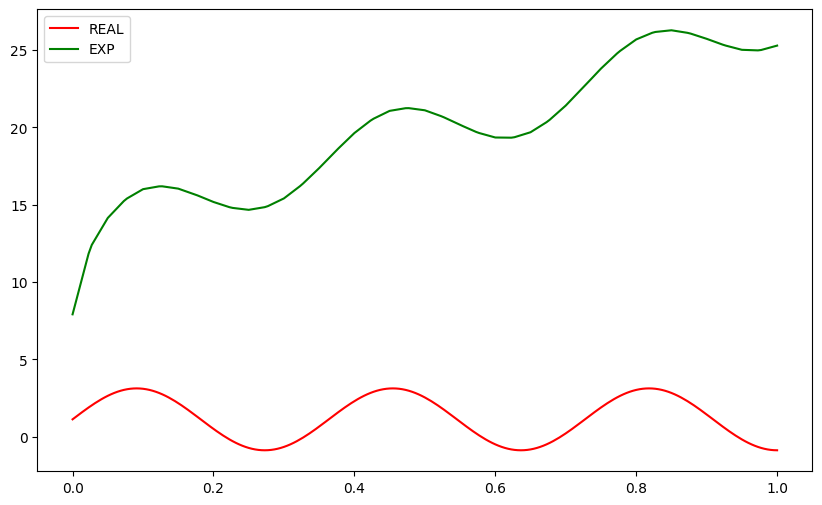

In [15]:
plt.figure(figsize=(10, 6))
plt.plot( X,real(X),c='r', label="REAL")
plt.plot( X,Y_app,c='g', label="EXP")
plt.legend()
plt.show()